# CHAPTER 03 파이토치로 구현하는 ANN

필요한 라이브러리 설치유무 확인

In [1]:
from importlib import import_module

required_packages = [
    ("torch", "파이토치"),
    ("torchvision", "토치비전"),
    ("torchtext", "토치텍스트"),
    ("numpy", "넘파이"), 
    ("matplotlib", "맷플롯립"),
    ("sklearn", "사이킷런"),
]
installed_packages = []
uninstalled_packages = []

def run():
    is_ready = True
    for package_name, korean_name in required_packages:
        printed_name = "%s(%s)" % (korean_name, package_name)
        try:
            imported_package = import_module(package_name)
            installed_packages.append("%s 버전:%s" % (printed_name, imported_package.__version__))
        except:
            is_ready = False
            uninstalled_packages.append(printed_name)

    if is_ready:
        print("축하합니다! 3분 딥러닝 파이토치맛 예제 실행을 위한 환경설정이 끝났습니다.")
        print("설치된 라이브러리 정보:")
        for pkg in installed_packages:
            print(" * " + pkg)
    else:
        print("미설치된 라이브러리가 있습니다.")
        print("설치된 라이브러리 정보:")
        for pkg in installed_packages:
            print(" * " + pkg)
        print("미설치된 라이브러리 정보:")
        for pkg in uninstalled_packages:
            print(" * " + pkg)
    return is_ready 


if __name__ == "__main__":
    run()

축하합니다! 3분 딥러닝 파이토치맛 예제 실행을 위한 환경설정이 끝났습니다.
설치된 라이브러리 정보:
 * 파이토치(torch) 버전:1.10.0+cu111
 * 토치비전(torchvision) 버전:0.11.1+cu111
 * 토치텍스트(torchtext) 버전:0.11.0
 * 넘파이(numpy) 버전:1.21.5
 * 맷플롯립(matplotlib) 버전:3.2.2
 * 사이킷런(sklearn) 버전:1.0.2


## 3.1 텐서와 Autograd

In [2]:
import torch    # 파이토치 import

#### 텐서의 차원 다루기

In [9]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [10]:
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [11]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)  # 0번째 차원에 1이라는 차원값 추가
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [ ]:
# 랭크 줄이기
x = torch.squeeze(x)    # 크기가 1인 랭크를 삭제하여 다시 랭크 2 텐서로 되돌리기
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [13]:
# 텐서의 모양 바꾸기
x = x.view(1,1,3,3)   # reshape와 유사
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]])
Size: torch.Size([1, 1, 3, 3])
Shape: torch.Size([1, 1, 3, 3])
랭크(차원): 4


In [14]:
# view()함수로 텐서의 원소 개수를 바꿀 수는 없다
try:
    x = x.view(2,4)
except Exception as e:
    print(e)

shape '[2, 4]' is invalid for input of size 9


#### 텐서를 이용한 연산과 행렬곱

In [15]:
# 행렬 생성
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 0.0147, -0.0648, -0.9474],
        [ 0.5289,  0.0106, -1.0004],
        [ 0.2535,  0.4434, -0.0265],
        [ 0.2680,  0.1107,  1.5002],
        [ 0.2795, -2.1090, -0.7208]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [16]:
b = torch.randn(5,2, dtype=torch.float)
print("b size:", b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[-0.0706,  0.2396],
        [ 0.1298,  0.8927],
        [ 0.0721, -0.3963],
        [-1.1602, -0.6877],
        [ 0.1802,  0.3257]])


In [17]:
wx = torch.mm(w,x)  # torch.mm(A,B) -> A와 B의 행렬곱
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ -4.9165,  -5.9139],
        [ -4.4411,  -4.9019],
        [  1.4511,   2.1214],
        [  8.1014,   9.9803],
        [ -9.6513, -12.2015]])


In [18]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ -4.9870,  -5.6743],
        [ -4.3112,  -4.0092],
        [  1.5232,   1.7252],
        [  6.9412,   9.2926],
        [ -9.4711, -11.8759]])


#### Autograd

- Atutograd : 수식의 기울기를 자동으로 계산 (자동 미분)

In [29]:
# requires_grad=True로 설정하면 Autograd 기능이 자동으로 계산할 때 미분값을 w.grad에 저장한다
w = torch.tensor(1.0, requires_grad=True) # 스칼라
a = w*3
l = a**2

$l = a^2 = (3w)^2 = 9w^2$

위 수식에서 $l$을 $w$로 미분해보자.

In [30]:
l.backward()    # 연쇄법칙을 이용해서 a와 w로 차례대로 미분
print(f"l을 w로 미분한 값은 {format(w.grad)}")  # w.grad에 미분값이 저장되어 있다

l을 w로 미분한 값은 18.0


## 3.2 경사하강법으로 이미지 복원하기

이미지 처리 함수 ( weird_function() )에 버그가 들어가서 생성된 오염된 이미지 복원하기

1. 오염된 이미지와 크기가 같은 랜덤 텐서 생성.
2. weird_function(랜덤 텐서) --> 오염된 이미지라고 가정
3. 가정한 이미지와 실제 오염된 이미지의 오차가 최소화되도록 모델 훈련 (경사하강법 사용)

In [36]:
import pickle
import matplotlib.pyplot as plt

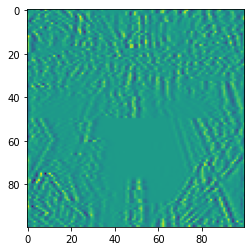

In [37]:
# 오염된 이미지 읽어오기
path = "/content/drive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN"
broken_image = torch.FloatTensor(pickle.load(open(f"{path}/broken_image_t.p", 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))  # 100 x 100으로 크기 변환 후 시각화

In [38]:
# 이미지를 오염시키는 함수
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [39]:
# 무작위 텐서를 weird_function()에 입력한 텐서와 오염된 이미지 사이의 오차를 구하는 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)  # torch.dist(): 두 텐서 사이의 거리를 구하는 함수

In [48]:
# broken_image와 같은 모양과 랭크를 지닌 텐서 생성
random_tensor = torch.randn(10000, dtype=torch.float)

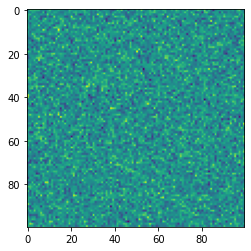

In [45]:
plt.imshow(random_tensor.view(100,100))
plt.show()

In [49]:
lr = 0.8    # 학습률 설정

for i in range(0,20000): # 경사하강법 20,000번 반복
    random_tensor.requires_grad_(True)  # 오차함수를 random_tensor로 미분해야하므로 requires_grad를 True로 설정
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():  # 자동 기울기 계산 비활성화
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.459372520446777
Loss at 1000 = 1.1480015516281128
Loss at 2000 = 0.546833336353302
Loss at 3000 = 0.379489541053772
Loss at 4000 = 0.2993156611919403
Loss at 5000 = 0.25002577900886536
Loss at 6000 = 0.2148149162530899
Loss at 7000 = 0.18707576394081116
Loss at 8000 = 0.16371019184589386
Loss at 9000 = 0.14308831095695496
Loss at 10000 = 0.12428456544876099
Loss at 11000 = 0.10674082487821579
Loss at 12000 = 0.09010569006204605
Loss at 13000 = 0.07414897531270981
Loss at 14000 = 0.05871614068746567
Loss at 15000 = 0.043701883405447006
Loss at 16000 = 0.02903522178530693
Loss at 17000 = 0.02115398831665516
Loss at 18000 = 0.021166296675801277
Loss at 19000 = 0.021167917177081108


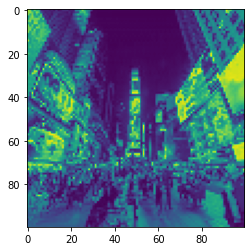

In [50]:
# 경사하강법을 20,000번 반복해 복원한 이미지
plt.imshow(random_tensor.view(100,100).data)

원본이미지는 뉴욕 타임스퀘어의 풍경이었다!

## 3.3 신경망 모델 구현하기

- 인공신경망 (ANN)

 입력층, 은닉층을 지나 출력층으로 전달
 
 1. 각 층에 존재하는 **가중치**에 행렬곱시키고 **편향** 더해줌

 2. 이 행렬곱의 결과는 **활성화 함수**를 거쳐서 인공뉴런의 결괏값을 출력
 
 3. 이 과정을 층마다 반복 ...

 4. 결괏값과 정답을 비교해 오차를 계산 --> 역전파

 역전파 : 겹겹이 쌓인 가중치를 뒤에서부터 차례대로 조정, 최적화하는 알고리즘

#### 간단한 분류 모델 구현하기

In [51]:
from sklearn.datasets import make_blobs
import numpy

In [52]:
# 학습과 평가에 사용할 데이터셋 생성
n_dim = 2

# make_blobs: 무작위 클러스터 데이터 생성
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                            shuffle=True, cluster_std=0.3)

In [53]:
# 생성한 클러스터가 4개이므로 분류를 하기위해서 4개를 2개로 합치자
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0) # 0,1 -> 0 로 
y_train = label_map(y_train, [2, 3], 1) # 2,3 -> 1 로
y_test = label_map(y_test, [0, 1], 0)   
y_test = label_map(y_test, [2, 3], 1)

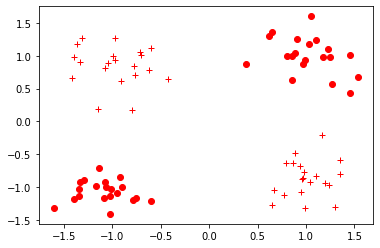

In [61]:
# 생성한 데이터셋 시각화
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

# 0은 'o'로, 1은 '+'로 표시

In [69]:
# 넘파이 벡터 형식 데이터를 파이토치 텐서로 변환
x_train = torch.FloatTensor(x_train)
print(f"x_train.shape: {x_train.shape}")
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
print(f"y_train.shape: {y_train.shape}")
y_test = torch.FloatTensor(y_test)

x_train.shape: torch.Size([80, 2])
y_train.shape: torch.Size([80])


In [71]:
# 신경망 모델 정의
class NeuralNet(torch.nn.Module):  # 신경망은 보통 torch.nn.Module을 상속받는 파이썬 클래스로 정의한다.
    def __init__(self, input_size, hidden_size): # 입력층 크기, 은닉층 크기 입력받아서 생성
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        # torch.nn.Linear: 행렬곱과 편향을 포함하는 연산을 지원하는 객체 반환
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
            
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)  # 0과 1사이의 임의의 수로 제한해준다
        return output

In [82]:
model = NeuralNet(2, 5) # input_size=2, hidden_size=5
learning_rate = 0.03    # 학습률 설정
criterion = torch.nn.BCELoss()  # 오차함수 (이진 교차 엔트로피)

epochs = 2000   # 에폭 설정
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 확률적경사하강법 적용

In [83]:
model.parameters

<bound method Module.parameters of NeuralNet(
  (linear_1): Linear(in_features=2, out_features=5, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=5, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)>

In [94]:
# 학습을 하지 않은 모델 성능 평가
model.eval()    # 평가모드
test_loss_before = criterion(model(x_test).squeeze(), y_test)   # 오차 계산
print('Before Training, test loss is {}'.format(test_loss_before.item()))   # tensor.item(): 텐서를 스칼라값으로 반환

Before Training, test loss is 0.6753840446472168


분류하는 능력이 없다.

In [98]:
model(x_test).size(), model(x_test).squeeze().size()

(torch.Size([20, 1]), torch.Size([20]))

In [99]:
for epoch in range(epochs):
    model.train()   # 학습모드로 변경
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6683863997459412
Train loss at 100 is 0.5475014448165894
Train loss at 200 is 0.45522961020469666
Train loss at 300 is 0.360872358083725
Train loss at 400 is 0.2687590718269348
Train loss at 500 is 0.19304057955741882
Train loss at 600 is 0.13966739177703857
Train loss at 700 is 0.10457174479961395
Train loss at 800 is 0.08153798431158066
Train loss at 900 is 0.0658889040350914
Train loss at 1000 is 0.05479508638381958
Train loss at 1100 is 0.046647101640701294
Train loss at 1200 is 0.0404769666492939
Train loss at 1300 is 0.03570631891489029
Train loss at 1400 is 0.0318920873105526
Train loss at 1500 is 0.028778359293937683
Train loss at 1600 is 0.02618933841586113
Train loss at 1700 is 0.024011844769120216
Train loss at 1800 is 0.022154081612825394
Train loss at 1900 is 0.020552001893520355


In [102]:
# 훈련 후 모델 성능 평가
model.eval()    # 평가 모드로 변경
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f"After Training, test loss is {test_loss.item()}")

After Training, test loss is 0.03835906460881233


In [104]:
model.state_dict()

OrderedDict([('linear_1.weight', tensor([[ 1.6050, -1.6710],
                      [ 1.5745,  1.3557],
                      [-1.2601, -1.7991],
                      [-0.1408, -0.3253],
                      [-1.3562,  1.0839]])),
             ('linear_1.bias',
              tensor([-0.1046,  0.1582, -0.1245,  0.0852,  0.4134])),
             ('linear_2.weight',
              tensor([[ 2.1880, -1.9717, -2.0699, -0.2166,  1.7445]])),
             ('linear_2.bias', tensor([0.4024]))])

In [105]:
# 학습된 모델 저장
torch.save(model.state_dict(), f"{path}/model.pt")
print(f"state_dict format of the model: {model.state_dict()}") # state_dict(): {연산이름: 가중치텐서 & 편향텐서}로 구성

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.6050, -1.6710],
        [ 1.5745,  1.3557],
        [-1.2601, -1.7991],
        [-0.1408, -0.3253],
        [-1.3562,  1.0839]])), ('linear_1.bias', tensor([-0.1046,  0.1582, -0.1245,  0.0852,  0.4134])), ('linear_2.weight', tensor([[ 2.1880, -1.9717, -2.0699, -0.2166,  1.7445]])), ('linear_2.bias', tensor([0.4024]))])


In [106]:
# 저장된 모델 파일 읽어오기
new_model = NeuralNet(2, 5)  # 모델 객체 생성
new_model.load_state_dict(torch.load(f"{path}/model.pt")) # 가중치 입력

<All keys matched successfully>

In [107]:
# new_model은 시작부터 학습된 가중치를 가지고 있으므로 train하지 않아도 된다
new_model.eval()
print(f"벡터 [-1, 1]이 레이블 1을 가질 확률은 {new_model(torch.FloatTensor([-1,1])).item()}")

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9954153299331665
